In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Veri kümesini yükleyelim
dataset = sio.loadmat('ex4data1.mat')
# m = kaç tane resmimiz var?
m = dataset['X'].shape[0]

# Veri kümemizi eğitim ve doğrulama olarak ikiye ayırıyoruz.
x, val_x, y, val_y = train_test_split(dataset['X'], dataset['y'], test_size=0.2, random_state=42)

y_one_hot = y
enc = OneHotEncoder()
enc.fit(y_one_hot)
y_one_hot = enc.transform(y_one_hot).toarray()

# Girdi ve Çıktı Boyutlarını girelim
N, D_in, H, D_out = m, 400, 100, 10

In [40]:
# Ağırlıklar rasgele ilk değerler atanmıştır
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
b1 = np.zeros((1,))
b2 = np.zeros((1,))

In [41]:
# Non-linearity Fonksiyonumuz : ReLU ve türevi
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    for i in range(x.shape[0]):
        x[i]
        x[i] = np.exp(x[i])/ np.sum(np.exp(x[i]), axis=0)
    return x

def softmax_backward(x):
    return x *(1. - x)

def relu_backward(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_backward(x):
    return x*(1-x)

In [42]:
from IPython.core.display import SVG
from IPython.core.display import HTML

display(HTML("<img src='cost.png' title='Title text' />"))


In [43]:
# Loss değerleri listesi 
j_history =  []

learning_rate = 0.1
m = x.shape[0]

for t in range(3000):
    # Forward pass: tahmini y değerlerini hesapla
    h1 = x.dot(w1) + b1
    a1 = relu(h1)
    h2 = a1.dot(w2)+ b2
    a2 = softmax(h2/10)
    y_pred = a2

    # Loss'u hesapla ve geçmişe at
    loss =-np.sum(np.multiply(y_one_hot,np.log(y_pred))+np.multiply(1-y_one_hot,np.log(1-y_pred))) /m
    j_history.append(loss)
    
    # Loss'un w1 ve w2' ye göre türevleri
    da2 = -((np.divide(y_one_hot,y_pred) - np.divide(1-y_one_hot,1-y_pred)))/m
    dh2 = np.multiply(da2,softmax_backward(a2))
    dw2 =  a1.T.dot(dh2)
    db2 = np.sum(dh2)
    da1 = w2.dot(dh2.T).T
    dh1 = np.multiply(relu_backward(h1),da1)
    dw1 = np.matmul(x.T,dh1)
    db1 = np.sum(dh1)
    
    # Loss türev
    # türev w2 
    
    # Ağırlıkları güncelle
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2

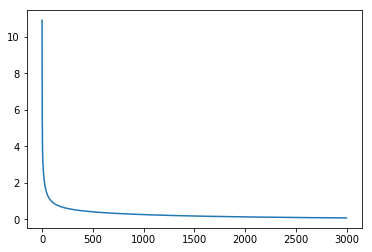

In [44]:
plt.plot(j_history)

In [45]:
# Doğrulama (Validation) verisi üzerinden başarım oranı hesaplanacak
# Önce doğrulama verisinden tahminler alalım

h = val_x.dot(w1)
a1 = relu(h)
h2 = a1.dot(w2)+ b2
a2 = softmax(h2/100)
y_pred = a2
print(val_y.shape)

(1000, 1)


In [46]:
# Başarım Oranını hesaplayalım

counter = 0
for i, j in zip(val_y, np.argmax(y_pred, axis=1)+1):
    # print('{}-{}-{}'.format(i,j,i==j))
    if i == j:
        counter += 1

# print(val_y.shape[0])
# print(counter)
print("Başarım Oranı: {}".format(counter  / val_y.shape[0]*100))


Başarım Oranı: 91.3
